In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
covid19 = pd.read_csv('covid_19_clean_complete.csv')

In [5]:
covid19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
covid19_by_country = covid19.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

In [7]:
covid19_by_country.reset_index(inplace=True)

In [8]:
covid19_by_country.sort_values('Confirmed', ascending=False, inplace=True)

In [9]:
covid19_by_country

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
...,...,...,...,...,...
140,Saint Kitts and Nevis,1772,0,1295,477
68,Greenland,1507,0,1372,135
75,Holy See,1356,0,742,614
130,Papua New Guinea,1185,2,695,488


In [10]:
covid19_by_country_date=covid19.groupby(['Country/Region','Date'])[['Confirmed','Deaths','Recovered', 'Active']].sum()

In [11]:
covid19_by_country_date=covid19_by_country_date.reset_index()

In [12]:
covid19_by_country_date

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Afghanistan,2020-01-23,0,0,0,0
2,Afghanistan,2020-01-24,0,0,0,0
3,Afghanistan,2020-01-25,0,0,0,0
4,Afghanistan,2020-01-26,0,0,0,0
...,...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510,1586
35152,Zimbabwe,2020-07-24,2296,32,514,1750
35153,Zimbabwe,2020-07-25,2434,34,518,1882
35154,Zimbabwe,2020-07-26,2512,34,518,1960


In [13]:
covid19_by_country_date[covid19_by_country_date.Confirmed>0]

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
33,Afghanistan,2020-02-24,1,0,0,1
34,Afghanistan,2020-02-25,1,0,0,1
35,Afghanistan,2020-02-26,1,0,0,1
36,Afghanistan,2020-02-27,1,0,0,1
37,Afghanistan,2020-02-28,1,0,0,1
...,...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510,1586
35152,Zimbabwe,2020-07-24,2296,32,514,1750
35153,Zimbabwe,2020-07-25,2434,34,518,1882
35154,Zimbabwe,2020-07-26,2512,34,518,1960


In [14]:
def get_overall_numbers(df,country='all'):
    df['Date']=df.Date.astype('datetime64') #set Date to datetime
    if country=='all': #all - takes data globally
        subset=df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
        subset=subset.reset_index()
    else:
        sub=df[df['Country/Region']==country] #take data for given country
        subset=sub.groupby(['Country/Region','Date'])[['Confirmed','Deaths','Recovered']].sum()
        subset=subset.reset_index()
    
    return subset[subset.Confirmed>0]

In [17]:
get_overall_numbers(covid19, 'US')

,Country/Region,Date,Confirmed,Deaths,Recovered
0,US,2020-01-22,1,0,0
1,US,2020-01-23,1,0,0
2,US,2020-01-24,2,0,0
3,US,2020-01-25,2,0,0
4,US,2020-01-26,5,0,0
...,...,...,...,...,...
183,US,2020-07-23,4038816,144430,1233269
184,US,2020-07-24,4112531,145560,1261624
185,US,2020-07-25,4178970,146465,1279414
186,US,2020-07-26,4233923,146935,1297863


<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

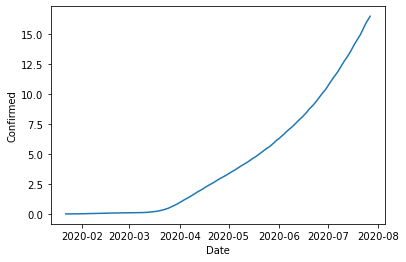

In [18]:
sns.lineplot(x=get_overall_numbers(covid19).Date,y=get_overall_numbers(covid19).Confirmed/1000000)